# [**Palindrome Partioning**](https://www.geeksforgeeks.org/problems/palindromic-patitioning4845/1)


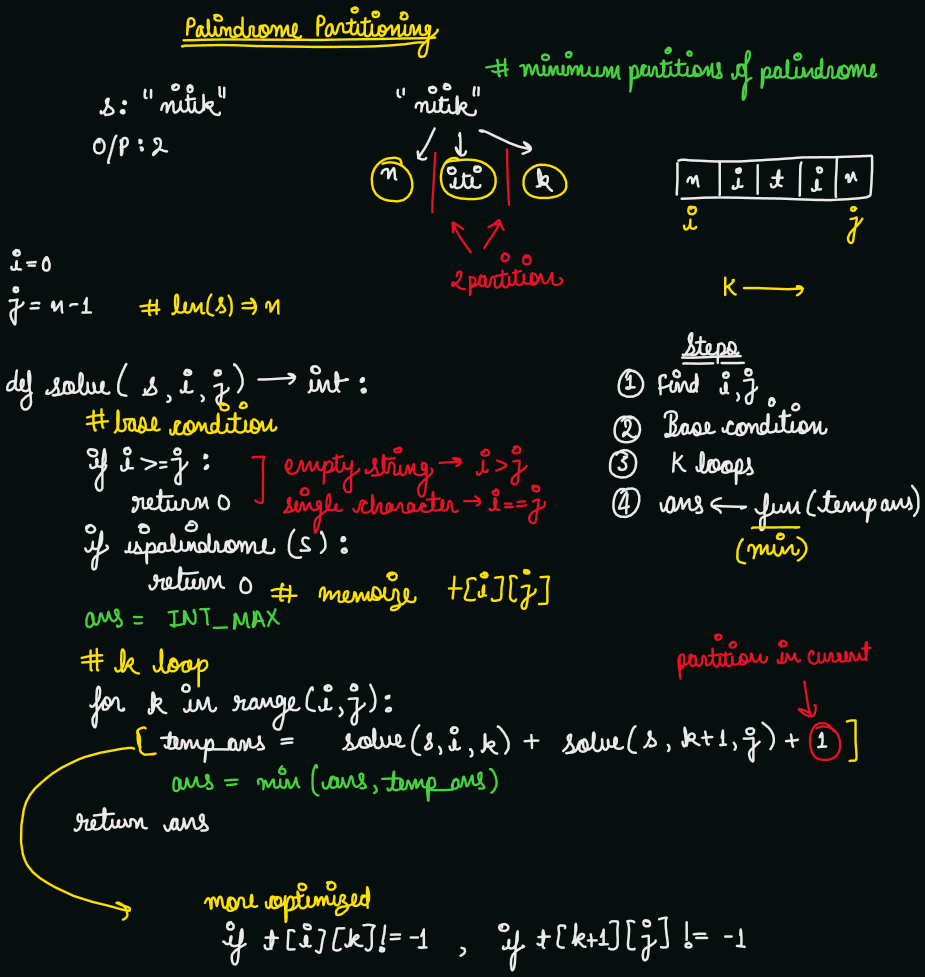

# Recursive

In [17]:
def check_palindrome(s):
    # print(s)
    return s== s[::-1]

class Solution:
    def solve(self, s, i, j):
        # print(s[j+1:i-1:-1])
        # base conditions
        
        # 1. empty string or single character
        if i>=j:
            return 0
        
            
        # 2. already palindrome
        if check_palindrome(s[i:j+1]):
            return 0
            
        ans=  501
        for k in range(i, j):
            temp_ans= 1+ self.solve(s, i, k)+ self.solve(s, k+1, j)
            ans= min(ans, temp_ans)
        # print(s, ans)
        
        return ans
            
        
    def palindromicPartition(self, string):
        # code here
        i= 0
        j= len(string)-1
        
        return self.solve(string, i, j)
        

s= Solution()

In [18]:
s.palindromicPartition("aaabba")

1

In [19]:
s.palindromicPartition("ababbbabbababa")

3

In [6]:
string= "aaabba"
i= 0
j= len(string)-1
print(i,j)
string[j:i-1:-1]

0 5


''

In [12]:
string[::-1]

'abbaaa'

# Memoization

In [20]:
#User function Template for python3
def check_palindrome(s):
    # print(s)
    return s== s[::-1]

class Solution:
    def solve(self, s, i, j):
        # print(s[j+1:i-1:-1])
        # base conditions
        
        # 1. empty string or single character
        if i>=j:
            return 0
        
            
        # 2. already palindrome
        if check_palindrome(s[i:j+1]):
            return 0
            
        if self.t[i][j]!=-1:
            return self.t[i][j]
            
        ans=  501
        for k in range(i, j):
            left= -1
            right= -1
            
            if self.t[i][k]!=-1:
                left= self.t[i][k]
            else:
                self.t[i][k]= self.solve(s, i, k)
                left= self.t[i][k]
                
            if self.t[k+1][j]!=-1:
                right= self.t[k+1][j]
            else:
                self.t[k+1][j]= self.solve(s, k+1, j)
                right= self.t[k+1][j]
                
                
            
            temp_ans= 1+ left+ right
            # ans= min(ans, temp_ans)
            if temp_ans<ans:
                ans= temp_ans
        # print(s, ans)
        self.t[i][j]= ans
        return ans
            
        
    def palindromicPartition(self, string):
        # code here
        i= 0
        j= len(string)-1
        
        self.t= [[-1 for x in range(501)] for y in range(501)]
        
        return self.solve(string, i, j)
        

s= Solution()

In [23]:
s.palindromicPartition("abbbbacaaa")
for i in s.t:
    print(i)

[0, 1, 1, 1, 1, 0, 1, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

# More Optimized solution

In [26]:
class Solution:
    def palindromicPartition(self, string):
        n = len(string)

        # initialization
        t = [0] * n


        def is_palindrome(s, start, end):
            s= s[start:end+1]
            return s==s[::-1]

            
            

        # i [start----->end]
        # j [start<-----end]
        for i in range(n):
            min_cuts = i  
            
            for j in range(i, -1, -1):
                if is_palindrome(string, j, i):
                    if j == 0:
                        min_cuts = 0
                    else:
                        min_cuts = min(min_cuts, 1 + t[j - 1])
            t[i] = min_cuts


        return t[n - 1]


2
